In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
snmp_results_path = '../output/testing_snmp_results.csv'
column_names = ["Domain", "IP", "AuthoritativeEngineBoots", "AuthoritativeEngineTimes", "EngineID", "ScanTime"]

df = pd.read_csv(snmp_results_path, names=column_names)
df_no_errors = df[df['AuthoritativeEngineBoots'] != 'Error']

df.head()

,Domain,IP,AuthoritativeEngineBoots,AuthoritativeEngineTimes,EngineID,ScanTime
0,Domain,IP,AuthoritativeEngineBoots,AuthoritativeEngineTimes,EngineID,ScanTime
1,195.43.87.140,193.227.230.1,0,2024-03-20T09:14:16+01:00,80003a8c044e4f43233031,2024-03-20T09:14:16+01:00
2,195.43.87.140,213.133.166.13,Error,Error,Error,Error
3,195.43.87.140,185.1.50.153,Error,Error,Error,Error
4,195.43.87.140,195.122.18.250,Error,Error,Error,Error


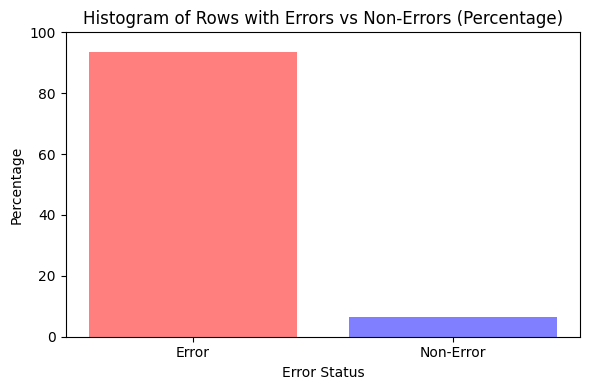

In [4]:
total_rows = len(df)

error_percentage = (df[df['AuthoritativeEngineBoots'] == 'Error'].shape[0] / total_rows) * 100
non_error_percentage = (df[df['AuthoritativeEngineBoots'] != 'Error'].shape[0] / total_rows) * 100

plt.figure(figsize=(6, 4))
plt.bar(['Error', 'Non-Error'], [error_percentage, non_error_percentage], color=['red', 'blue'], alpha=0.5)
plt.xlabel('Error Status')
plt.ylabel('Percentage')
plt.title('Histogram of Rows with Errors vs Non-Errors (Percentage)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [5]:
ip_count_per_engine = df_no_errors.groupby('EngineID')['IP'].nunique().sort_values(ascending=False)
duplicates = ip_count_per_engine[ip_count_per_engine > 1]

print("EngineID with multiple IPs:")
for engine_id, count in duplicates.items():
    group_df = df_no_errors[df_no_errors['EngineID'] == engine_id]
    print(f"EngineID: {engine_id}, Count: {count}")
    print(group_df['IP'].unique())
    print()

EngineID with multiple IPs:
EngineID: 00000009030000a742533de0, Count: 2
['62.115.15.5' '213.248.86.1']

